# <center> ISE529 - Final Project </center>
## <center> Santander Customer Transaction Prediction
<center> 13 Dec 19
    </center>
    
    Group - GOATeam
    Members:
        Junteng Zheng 6796-15-9196
        Claire Wu 4492-15-4713
        Boxue Li 9813-33-3187
        Sean Eskew 8439-71-6736
        
### Preface

Below is our work for the "Santander Customer Transaction Prediction" Competition on Kaggle.  Our work is divided into three major portions; Data Exploration, Data Preprocessing, and Data Modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test1.csv')

In [3]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
import lightgbm as lgb

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.preprocessing import QuantileTransformer

In [5]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

## Data Exploration

We begin this project by first exploring our data to ensure it is suitable for modeling.

First we visualize the data with a simple head call.  Here we can see that each identity has an identifying 'ID_code', a response variable of 'target', and 200 features (var_0 to var_199).

In [7]:
data_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [8]:
data_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

Then we confirm that our response is binary. And check to see the shape of our data finding 200,000 rows.

In [9]:
data_train['target'].unique()

array([0, 1])

In [85]:
data_train.shape

(200000, 210)

In [87]:
data_test.shape # Does not have target value row

(200000, 209)

Now we check for missing values and duplicates finding none.

In [86]:
data_train.isnull().sum().sum()

0

In [88]:
data_test.isnull().sum().sum()

0

In [89]:
data_train.duplicated().sum()

0

In [90]:
data_test.duplicated().sum()

0

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

Next we search our data to see if there is any correlation between our data to see its effect on our future models.  We first pull a random assortment of features to visualize the correlations.  We then search for the maximum correlations.  The maximum value is .009844, which shows that there is very little correlation between our feature set.

In [91]:
feature = data_train[2:].columns
random_feature = np.random.choice(feature, size=10, replace=False)
data_train[random_feature][::20].corr()

,var_186,var_34,var_144,var_182,var_67,var_38,var_143,var_29,var_54,var_193
var_186,1.000000,-0.006536,-0.006844,-0.009555,-0.003563,-0.005402,-0.008140,0.001525,-0.002247,0.002442
var_34,-0.006536,1.000000,-0.004898,-0.007816,0.019814,0.009537,0.024916,-0.002942,0.000259,-0.019912
var_144,-0.006844,-0.004898,1.000000,-0.015985,0.008164,0.002632,0.004429,0.008370,0.010917,0.003093
var_182,-0.009555,-0.007816,-0.015985,1.000000,0.017996,-0.002752,0.004099,0.006980,-0.007889,-0.005964
var_67,-0.003563,0.019814,0.008164,0.017996,1.000000,-0.011002,0.017284,-0.010370,0.013309,-0.019874
var_38,-0.005402,0.009537,0.002632,-0.002752,-0.011002,1.000000,-0.009415,0.001689,0.017797,-0.007272
var_143,-0.008140,0.024916,0.004429,0.004099,0.017284,-0.009415,1.000000,0.006824,-0.005035,0.003488
var_29,0.001525,-0.002942,0.008370,0.006980,-0.010370,0.001689,0.006824,1.000000,0.008258,-0.011328
var_54,-0.002247,0.000259,0.010917,-0.007889,0.013309,0.017797,-0.005035,0.008258,1.000000,-0.000695
var_193,0.002442,-0.019912,0.003093,-0.005964,-0.019874,-0.007272,0.003488,-0.011328,-0.000695,1.000000


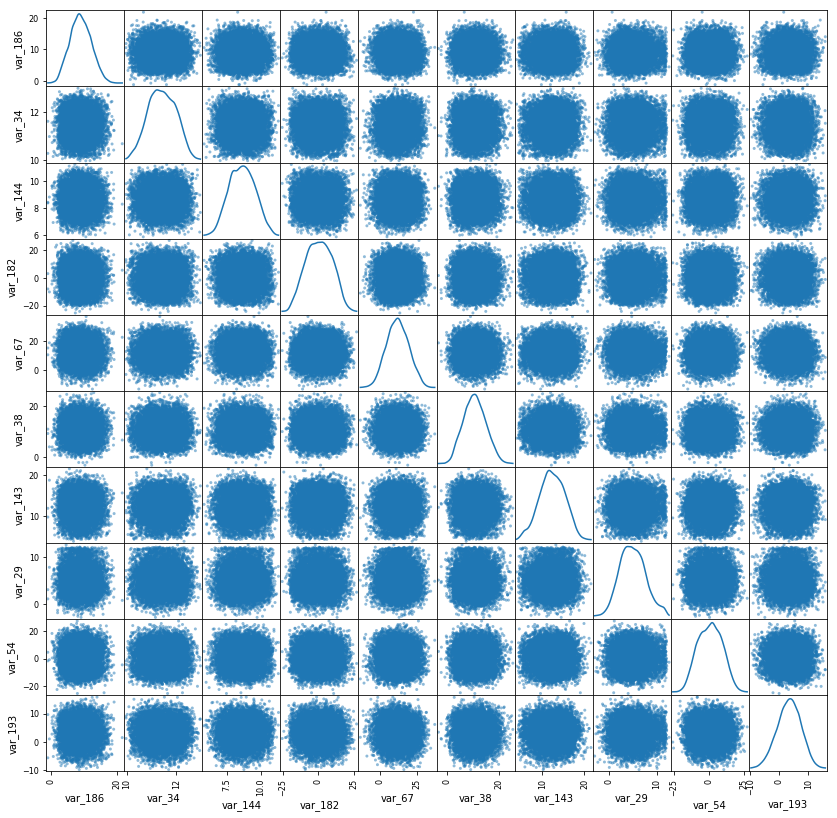

In [92]:
scatter_matrix(data_train[random_feature][::20], diagonal= 'kde',figsize=(14,14));

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

We then search for the maximum correlations.  The maximum value is .009844, which shows that there is very little correlation between our feature set.

In [13]:
correlations = data_train.drop(columns=['ID_code','target']).corr()\
            .abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.tail(10)

,level_0,level_1,0
39790,var_183,var_189,0.009359
39791,var_189,var_183,0.009359
39792,var_174,var_81,0.009490
39793,var_81,var_174,0.009490
39794,var_81,var_165,0.009714
39795,var_165,var_81,0.009714
39796,var_53,var_148,0.009788
39797,var_148,var_53,0.009788
39798,var_26,var_139,0.009844
39799,var_139,var_26,0.009844


<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

## Data Preprocessing

### Feature Engineering

From research through participants notebooks we found that some feature engineering will assist in our prediction.  Our goal for this portion is to utilize all 200 features to create 8 new features based on their combined statistical information

In [14]:
%%time
idx = features = data_train.columns.values[2:202]
for df in [data_train, data_test]:
    df['sum'] = df[idx].sum(axis=1)  
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['kurt'] = df[idx].kurtosis(axis=1)
    df['med'] = df[idx].median(axis=1)

CPU times: user 13 s, sys: 9.3 s, total: 22.3 s
Wall time: 16 s


In [15]:
sum(data_train.target)

20098

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

### Data Balancing

Now we'll address our dataset's unbalance.  Here we want to create our data set in such a way that 

Now we check the distribution between Target 0 and Target 1 to see how well balanced our provided dataset is.  We can see that only about 10% of our data is in the Target 1 category.  This is highly unbalanced, and we saw during our initial trials that it led to very poorly performing models that tended to predict Target 0 more often.

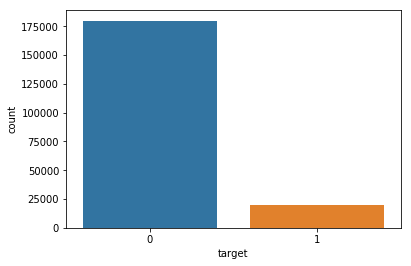

In [10]:
sns.countplot(data_train['target'])
plt.show()

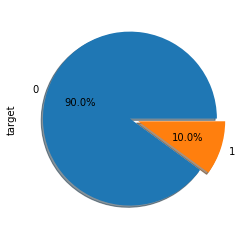

In [11]:
data_train['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',
                                             shadow=True)
plt.show()

In [16]:
# Balancing method found at https://elitedatascience.com/imbalanced-classes
# Separate majority and minority classes
df_one = data_train[data_train.target==1]
df_zero = data_train[data_train.target==0]
 
# Upsample minority class
df_zero_upsampled = resample(df_zero, 
                                 replace=True,     # sample with replacement
                                 n_samples=20098,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_one, df_zero_upsampled])
 
# Display new class counts
df_upsampled.target.value_counts()

1    20098
0    20098
Name: target, dtype: int64

Now that our data is balanced we will convert it to into our X and y's respective Train and Test sets.

In [17]:
y = df_upsampled.target
X = df_upsampled.drop(columns=['target','ID_code'])

In [18]:
X_pred = data_test.drop(columns=['ID_code'])

In [19]:
#kfold = KFold(n_splits = 5, random_state=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = .9, 
                                                    test_size =.1)

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

### Normalization

Now we normalize the data.  We used three transformers and checked their performance.  StandardScaler performed the best between itself, MinMaxScaler, QuantileTransformer.

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_pred = scaler.transform(X_pred)

In [22]:
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
#X_pred = scaler.transform(X_pred)

In [23]:
#scaler = QuantileTransformer(n_quantiles=10, random_state=0)
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
#X_pred = scaler.transform(X_pred)

### Principle Component Analysis

We attempted to use PCA to transform our data set.  However, using the full data set proved to perform better in the end.

In [24]:
#pca = PCA(0.50).fit(X_train)
#pca.n_components_

In [25]:
#X_train_comp = pca.transform(X_train)
#X_test_comp = pca.transform(X_test)

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

## Data Modeling

### Initial Analysis
We initially tested various models with untuned hyper-parameters to see the general performance of the different models.  We'll use these to set our priorities for tuning.

In [26]:
models = []
models.append(('LR',LogisticRegression(solver='liblinear')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Tree',DecisionTreeClassifier()))
models.append(('NB',GaussianNB())) # No additional tuning required
models.append(('SVM',SVC(kernel='rbf',gamma=1)))
models.append(('RF',RandomForestClassifier()))
models.append(('XGB',XGBClassifier()))
models.append(('GBM',LGBMClassifier()))

In [27]:
names = []
results = []
means = []
sdevs = []
scoring = 'accuracy'

In [28]:
for name, model in models:
    model.fit(X_train, y_train)
    means.append(model.score(X_test, y_test))
    #sdevs.append(cv_results.std())
    names.append(name)

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [29]:
df1 = pd.DataFrame()
df1['name'] = names
df1['accuracy'] = means
#df1['accuracy_std_dev'] = sdevs
df1

,name,accuracy
0,LR,0.784328
1,LDA,0.785572
2,KNN,0.564428
3,Tree,0.597512
4,NB,0.797512
5,SVM,0.549005
6,RF,0.654478
7,XGB,0.736318
8,GBM,0.784080


Here we see the most promising models include Logistic Regression, Linear Discriminant Analysis, Naive Bayes, XGBoost, and Light GMB.  Next we'll check the performance of a generic neural network.

In [30]:
model = Sequential()
model.add(Dense(128,kernel_initializer = 'uniform', activation = 'relu', 
                input_shape=(208,)))
model.add(Dense(128,kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(64,kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1,kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
model.fit(X_train,y_train,epochs=20,batch_size=1, verbose=0)

In [41]:
model.evaluate(X_test,y_test,verbose=0)

[2.6477809452891945, 0.7139303684234619]

This neural network after 20 epochs ranks 6th of our initial models.  The 20th epoch resulted in the following loss and accuracy scores; loss: 0.0536 - accuracy: 0.9824.  As it is such a time intensive model, we will focus on other models before revisiting the neural network.

### Data Tuning

We now move to tuning our models.  With a dataset this size, we found that tuning took a significant amount of time.  This limited us from fully tuning all models, but instead focusing on the models with highest potential.

### Gaussian Naive Bayes

In [44]:
m0 = GaussianNB() # No Tuning Required
m0.fit(X_train, y_train)
m0.score(X_test, y_test)

0.7975124378109453

In [45]:
yproba1 = m0.predict_proba(X_test)

In [46]:
y_proba1 = yproba1[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test,y_proba1)

df1 = pd.DataFrame()
df1['fpr'] = fpr1
df1['tpr'] = tpr1
df1['threshold'] = thresholds1

In [47]:
auc1 = roc_auc_score(y_test,y_proba1)
auc1

0.8747632474968342

In [49]:
yproba2 = m0.predict_proba(X_train)

In [50]:
y_proba2 = yproba2[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_train,y_proba2)

df1 = pd.DataFrame()
df1['fpr'] = fpr2
df1['tpr'] = tpr2
df1['threshold'] = thresholds2

auc2 = roc_auc_score(y_train,y_proba2)

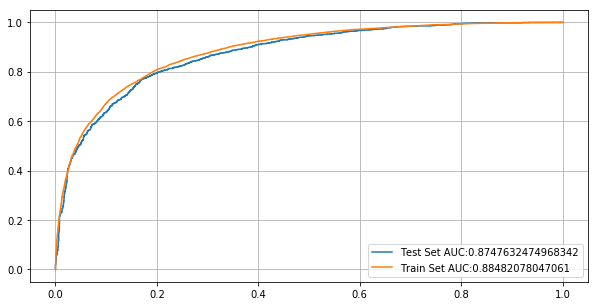

In [51]:
plt.figure(figsize=(10,5))
plt.plot(fpr1,tpr1,label='Test Set AUC:'+str(auc1))
plt.plot(fpr2,tpr2,label='Train Set AUC:'+str(auc2))
plt.legend(loc=4)
plt.grid()

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

### Logistic Regression

In [52]:
# Choose the type of classifier. 
clf = LogisticRegression()

# Choose some parameter combinations to try
parameters = {'penalty': ['l1', 'l2'], 
              'C':  np.logspace(-4, 4, 20),
              'solver': ['liblinear'], 
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
m1 = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
m1.fit(X_train, y_train)

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [53]:
m1.score(X_test,y_test)

0.7843283582089552

In [54]:
yproba1 = m1.predict_proba(X_test)

In [55]:
y_proba1 = yproba1[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test,y_proba1)

df1 = pd.DataFrame()
df1['fpr'] = fpr1
df1['tpr'] = tpr1
df1['threshold'] = thresholds1

In [56]:
auc1 = roc_auc_score(y_test,y_proba1)
auc1

0.8617194592983711

In [58]:
yproba2 = m1.predict_proba(X_train)

In [59]:
y_proba2 = yproba2[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_train,y_proba2)

df1 = pd.DataFrame()
df1['fpr'] = fpr2
df1['tpr'] = tpr2
df1['threshold'] = thresholds2

auc2 = roc_auc_score(y_train,y_proba2)

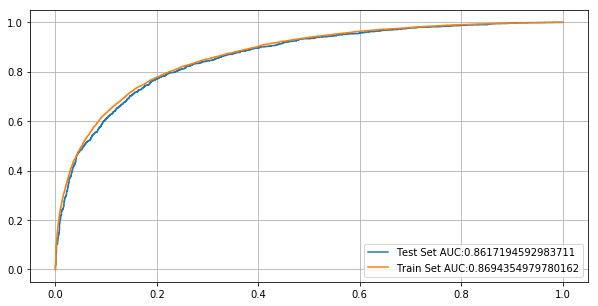

In [60]:
plt.figure(figsize=(10,5))
plt.plot(fpr1,tpr1,label='Test Set AUC:'+str(auc1))
plt.plot(fpr2,tpr2,label='Train Set AUC:'+str(auc2))
plt.legend(loc=4)
plt.grid()

Our logistic regression remains relatively unchanged after tuning.

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

### Linear Discriminant Analysis

In [ ]:
# Choose the type of classifier. 
clf = LinearDiscriminantAnalysis()

# Choose some parameter combinations to try
parameters = {'solver': ['svd','lsqr'],
              'n_components': [5,10,100,None],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
m2 = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
m2.fit(X_train, y_train)

In [62]:
m2.score(X_test,y_test)

0.7855721393034826

In [63]:
yproba1 = m2.predict_proba(X_test)

In [64]:
y_proba1 = yproba1[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test,y_proba1)

df1 = pd.DataFrame()
df1['fpr'] = fpr1
df1['tpr'] = tpr1
df1['threshold'] = thresholds1

In [65]:
auc1 = roc_auc_score(y_test,y_proba1)
auc1

0.8616508963675014

In [66]:
yproba2 = m2.predict_proba(X_train)

In [67]:
y_proba2 = yproba2[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_train,y_proba2)

df1 = pd.DataFrame()
df1['fpr'] = fpr2
df1['tpr'] = tpr2
df1['threshold'] = thresholds2

auc2 = roc_auc_score(y_train,y_proba2)

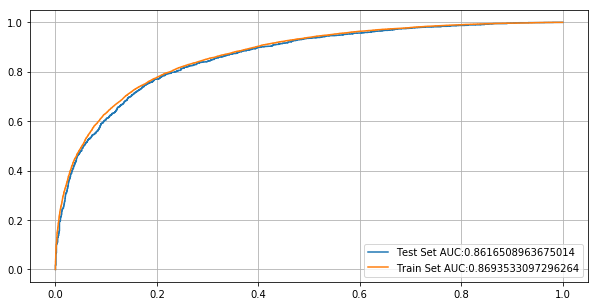

In [68]:
plt.figure(figsize=(10,5))
plt.plot(fpr1,tpr1,label='Test Set AUC:'+str(auc1))
plt.plot(fpr2,tpr2,label='Train Set AUC:'+str(auc2))
plt.legend(loc=4)
plt.grid()

Another slight improvement from tuning; however, still no significant increase.

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

<P style="page-break-before: always">

### Extreme Gradient Boost

Now we move on to our XGBoost.  This model has potential; however, it was a challenge to train it due to the time requirements to run through our data set.  We used the highspeed computing available from Amazon Web Services' SageMaker console, but still saw our ensemble models taking a significant amount of time to run (hours for anything greater than a 6 parameter, 3 fold GridSearch).

We attempted tune with smaller batches, using PCA to limit the features, and used a hypopt function to train without kfolds.  But all of those methods left us with degraded results.  In the end, our model performed better with more limited tuning while compared to the entire balanced dataset.

In [69]:
%%time
# Choose the type of classifier. 
clf = XGBClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [100, 500], 
              'max_depth': [2], 
              'learning_rate': [.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer, cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
m3 = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
m3.fit(X_train, y_train)

CPU times: user 12min 25s, sys: 0 ns, total: 12min 25s
Wall time: 12min 25s


In [71]:
m3.score(X_test,y_test)

0.7925373134328358

In [72]:
yproba1 = m3.predict_proba(X_test)

In [73]:
y_proba1 = yproba1[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test,y_proba1)

df1 = pd.DataFrame()
df1['fpr'] = fpr1
df1['tpr'] = tpr1
df1['threshold'] = thresholds1

In [74]:
auc1 = roc_auc_score(y_test,y_proba1)
auc1

0.868544193635578

In [75]:
yproba2 = m3.predict_proba(X_train)

In [76]:
y_proba2 = yproba2[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_train,y_proba2)

df1 = pd.DataFrame()
df1['fpr'] = fpr2
df1['tpr'] = tpr2
df1['threshold'] = thresholds2

auc2 = roc_auc_score(y_train,y_proba2)

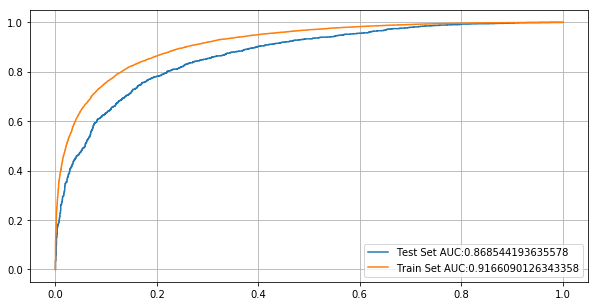

In [77]:
plt.figure(figsize=(10,5))
plt.plot(fpr1,tpr1,label='Test Set AUC:'+str(auc1))
plt.plot(fpr2,tpr2,label='Train Set AUC:'+str(auc2))
plt.legend(loc=4)
plt.grid()

We see an improvement of almost 6 percent with our tuned model placing XGBoost as our current top model.  However, despite the tuning we are still performing relatively poorly compared to the other competitors.  To improve our performance further we moved onto the Light GMB Model

<P style="page-break-before: always">

<P style="page-break-before: always">

## Light GMB Model - Final Submission

So far our efforts have resulted in small improvements.  To increase these, we researched the notebooks of past competitors to find methods that can help improve our scores from high 70s/low 80s to high 80s/low 90s.  The most beneficial Jupyter Notebook we utilized was "Santander EDA and Prediction" by Gabriel Preda, which highlighted a particular approach to apply our Light GMB model that results in a significantly increased score.  

In [78]:
from numba import jit

In [79]:
@jit
def augment(x,y,t=2):
    xs,xn = [],[]
    for i in range(t):
        mask = y>0
        x1 = x[mask].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xs.append(x1)

    for i in range(t//2):
        mask = y==0
        x1 = x[mask].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xn.append(x1)

    xs = np.vstack(xs)
    xn = np.vstack(xn)
    ys = np.ones(xs.shape[0])
    yn = np.zeros(xn.shape[0])
    x = np.vstack([x,xs,xn])
    y = np.concatenate([y,ys,yn])
    return x,y

In [80]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.335,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.041,
    'learning_rate': 0.0083,
    'max_depth': -1,
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': -1
}

In [81]:
#kfold = 15
#folds = StratifiedKFold(n_splits=kfold, shuffle=False, random_state=44000)
num_folds = 11
features = [c for c in df_upsampled.columns if c not in ['ID_code', 'target']]

folds = KFold(n_splits=num_folds, random_state=2319)
oof = np.zeros(len(df_upsampled))
getVal = np.zeros(len(df_upsampled))
predictions = np.zeros(200000)
feature_importance_df = pd.DataFrame()

In [ ]:
test = data_test.iloc[:,1::]
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_upsampled.values, 
                                                       df_upsampled.values)):
    
    X_train, y_train = df_upsampled.iloc[trn_idx][features], \
                        df_upsampled.target.iloc[trn_idx]
    X_valid, y_valid = df_upsampled.iloc[val_idx][features], \
                        df_upsampled.target.iloc[val_idx]
    
    X_tr, y_tr = augment(X_train.values, y_train.values)
    X_tr = pd.DataFrame(X_tr)
    
    print("Fold idx:{}".format(fold_ + 1))
    trn_data = lgb.Dataset(X_tr, label=y_tr)
    val_data = lgb.Dataset(X_valid, label=y_valid)
    
    clf = lgb.train(param, trn_data, 1000000, valid_sets = [trn_data, val_data], 
                    verbose_eval=5000, early_stopping_rounds = 4000)
    oof[val_idx] = clf.predict(df_upsampled.iloc[val_idx][features], 
                               num_iteration=clf.best_iteration)
    getVal[val_idx]+= clf.predict(df_upsampled.iloc[val_idx][features], 
                                  num_iteration=clf.best_iteration) / folds.n_splits
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test[features], 
                               num_iteration=clf.best_iteration) / folds.n_splits;

One fold results shown here to save space

Early stopping, best iteration is:

[16750]	training's auc: 0.960467	test's auc: 0.901262

As can be seen this model has the highest AUC across the test set of our models.  We now submit our predictions to Kaggle.

In [84]:
sub6 = pd.DataFrame({"ID_code":data_test["ID_code"].values})
sub6["target"] = predictions
sub6.to_csv("sub6.csv", index=False)

This allowed us to create a tuned Light GBM model to increase our Kaggle score to _**89.73%**_.  This score falls within the middle of the competition submissions.  With the highest score on the leader board being 92.6%.